In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'ingressi_terapia_intensiva',
       'note_test', 'note_casi', 'variazione_terapia_intensiva',
       'variazione_ricoverati_con_sintomi', 'variazione_totale_ospedalizzati',
       'variazione_isolamento_domiciliare', 'nuovi_dimessi_guariti',
       'nuovi_deceduti', 'nuovi_tamponi', 'nuovi_casi_testati', 'ti_su_to',
       'to_su_tp', 'np_su_nt', 'np_su_nct', 'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [5]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 19037
Nuovi tamponi: 152334.0
Percentuale nuovi positivi/nuovi tamponi: 12.0 %
Nuovi guariti: 32324.0
Nuovi deceduti: 459.0
Variazione positivi ricoverati con sintomi: -668.0
Variazione positivi in terapia intensiva: -5.0
Variazione positivi in isolamento dimiciliare: -13073.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 25, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-26T17:00:00,12997,1284,14281,222403,236684,14443,17012,268626,37479,...,2423.0,141.0,124686.0,78816.0,8.99,6.03,13.64,21.58,6.29,6.50
1,2020-10-27T17:00:00,13955,1411,15366,239724,255090,18406,21994,271988,37700,...,3362.0,221.0,174398.0,106346.0,9.18,6.02,12.61,20.68,9.89,7.78
2,2020-10-28T17:00:00,14981,1536,16517,259940,276457,21367,24991,275404,37905,...,3416.0,205.0,198952.0,121820.0,9.30,5.97,12.56,20.51,8.86,8.38
3,2020-10-29T17:00:00,15964,1651,17615,281576,299191,22734,26831,279282,38122,...,3878.0,217.0,201452.0,118857.0,9.37,5.89,13.32,22.57,7.49,8.22
4,2020-10-30T17:00:00,16994,1746,18740,307046,325786,26595,31084,283567,38321,...,4285.0,199.0,215085.0,129688.0,9.32,5.75,14.45,23.97,5.75,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-21T17:00:00,25145,2731,27876,585706,613582,-9178,10872,1281258,69214,...,19632.0,415.0,87889.0,42338.0,9.80,4.54,12.37,25.68,-0.44,-1.47
57,2020-12-22T17:00:00,24948,2687,27635,578320,605955,-7627,13318,1301573,69842,...,20315.0,628.0,157705.0,55016.0,9.72,4.56,8.44,24.21,-1.61,-1.24
58,2020-12-23T17:00:00,24546,2624,27170,571646,598816,-7139,14522,1322067,70395,...,20494.0,553.0,183864.0,66673.0,9.66,4.54,7.90,21.78,-2.34,-1.18
59,2020-12-24T17:00:00,24070,2589,26659,566973,593632,-5184,18040,1344785,70900,...,22718.0,505.0,193777.0,77185.0,9.71,4.49,9.31,23.37,-1.33,-0.87


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

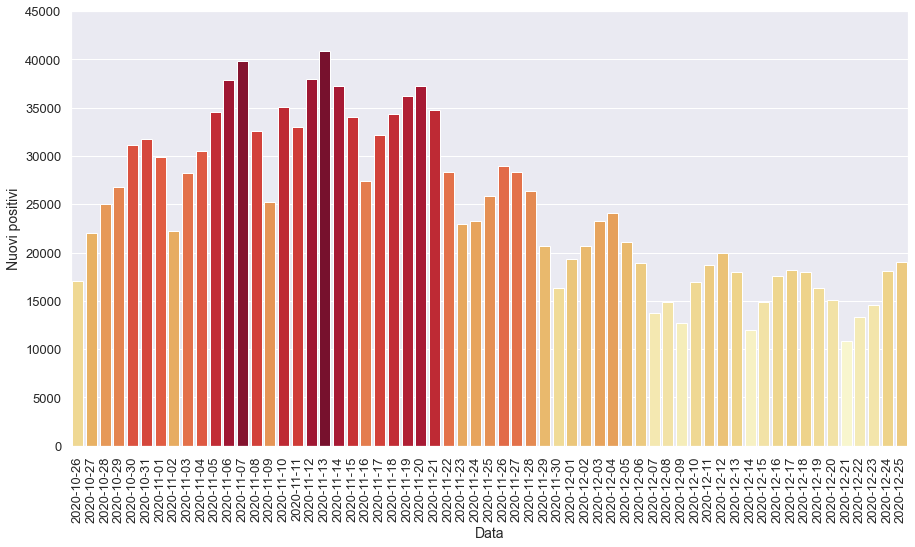

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

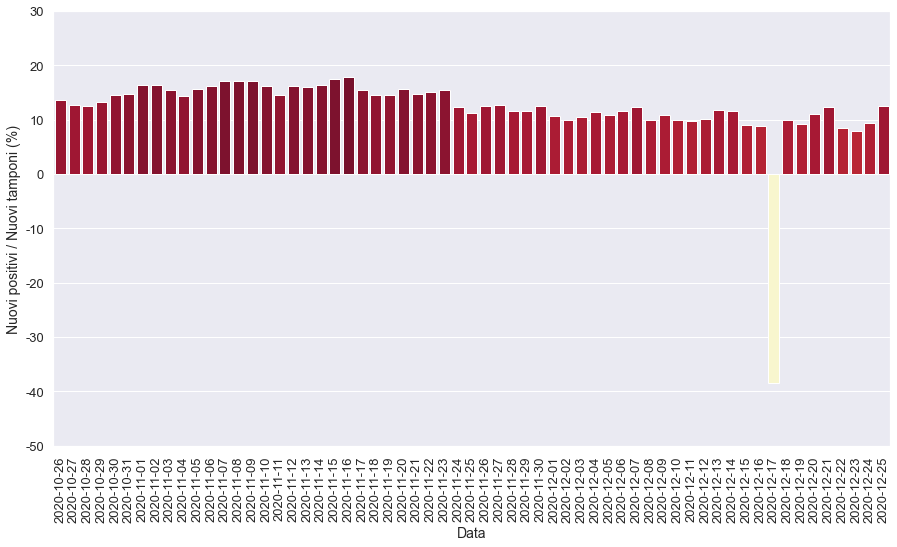

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

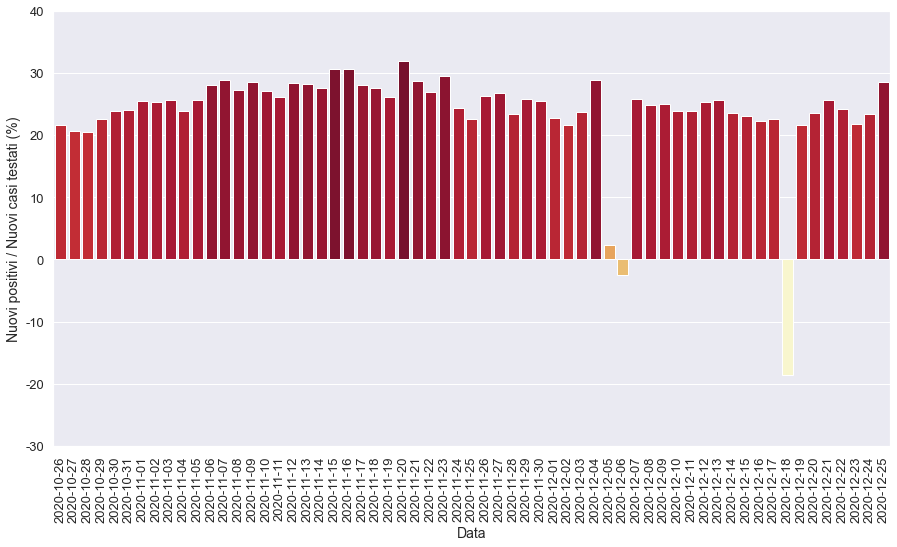

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

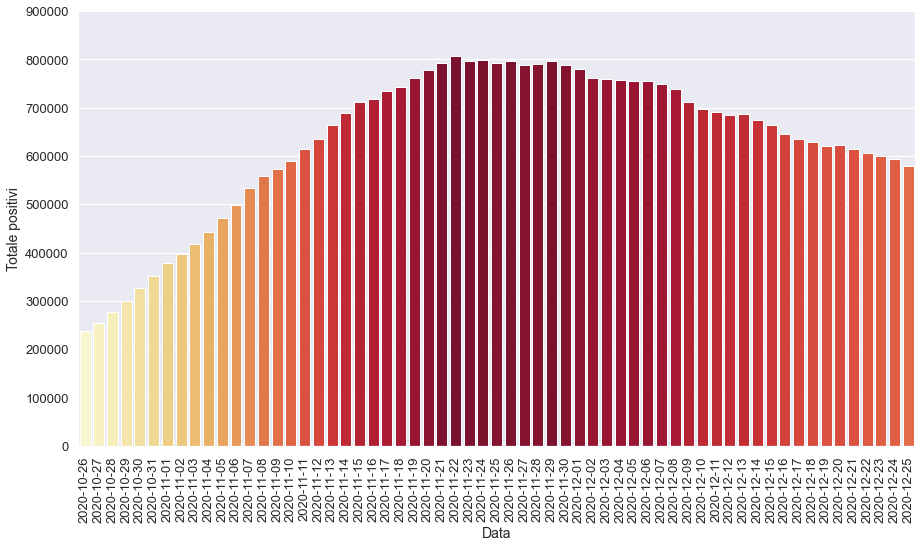

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

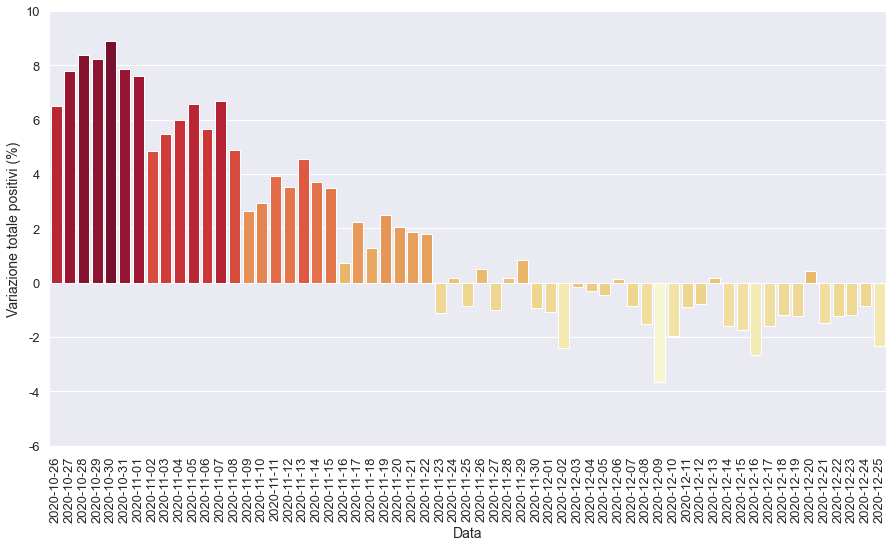

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

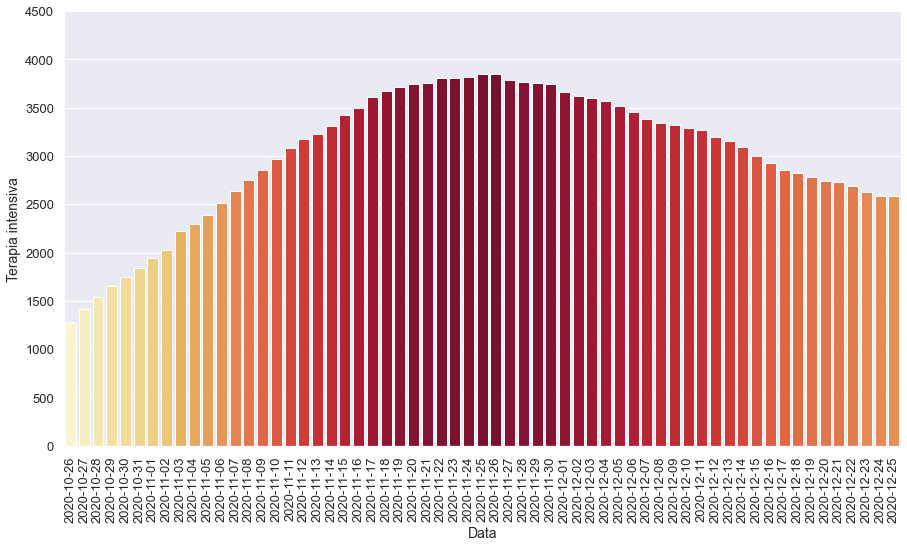

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

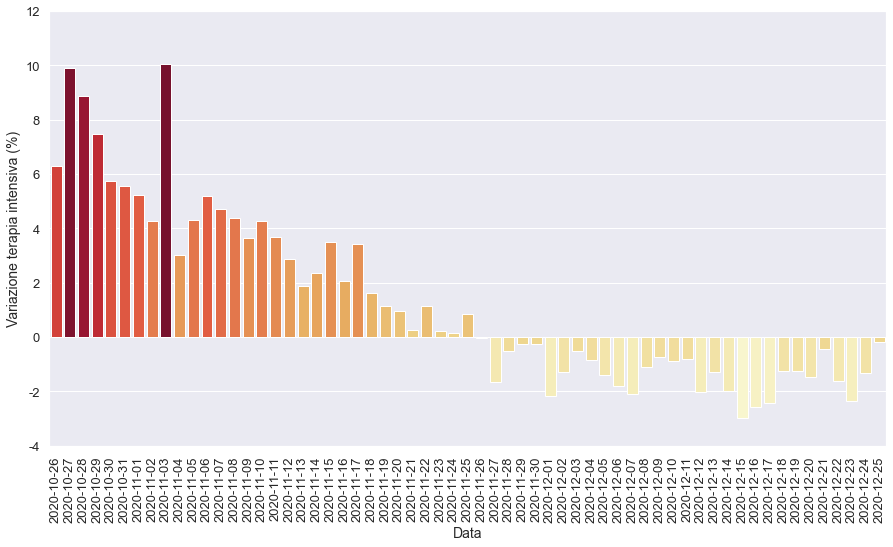

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

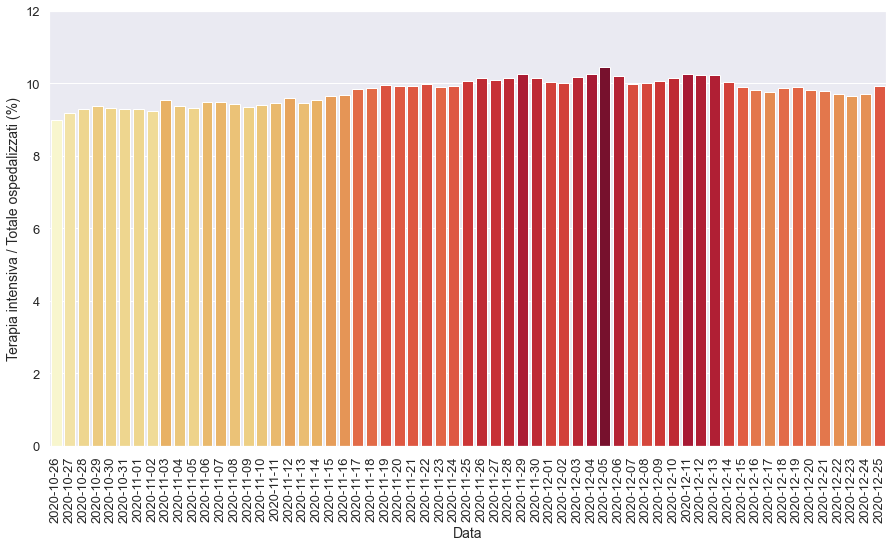

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

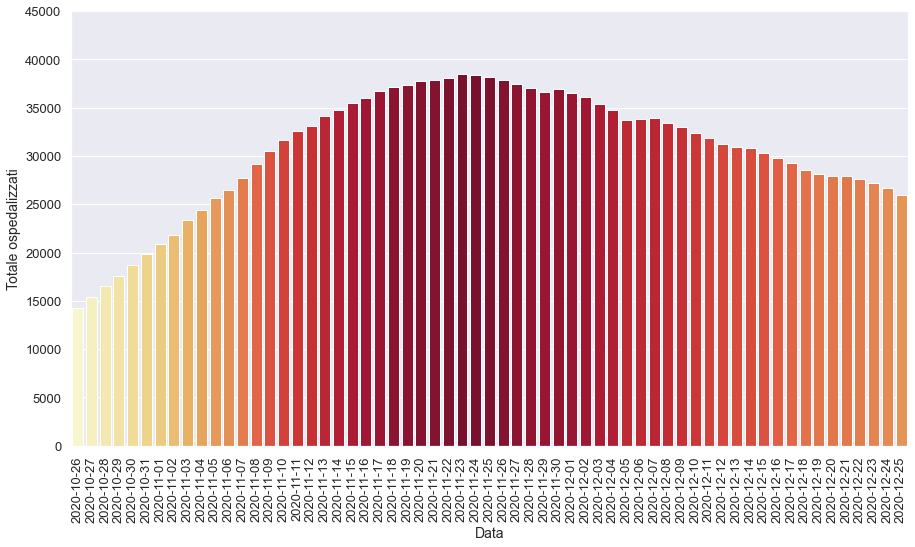

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

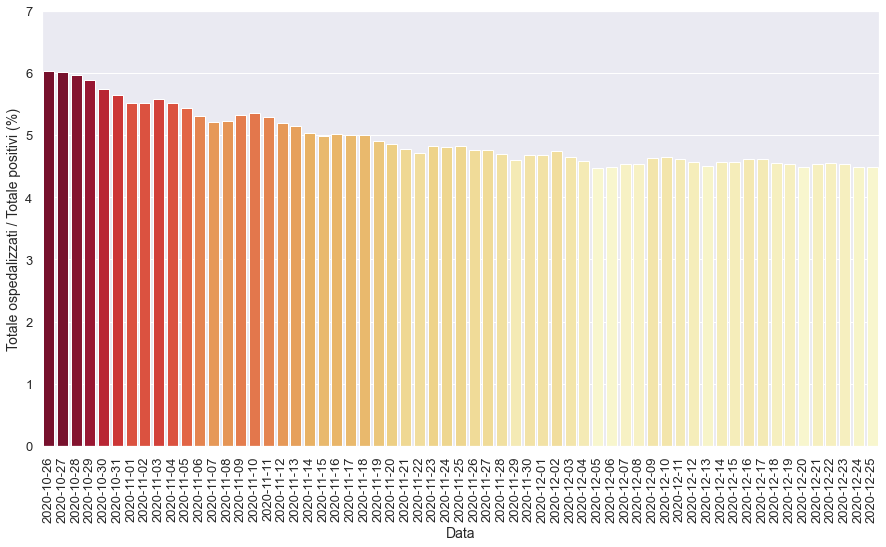

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

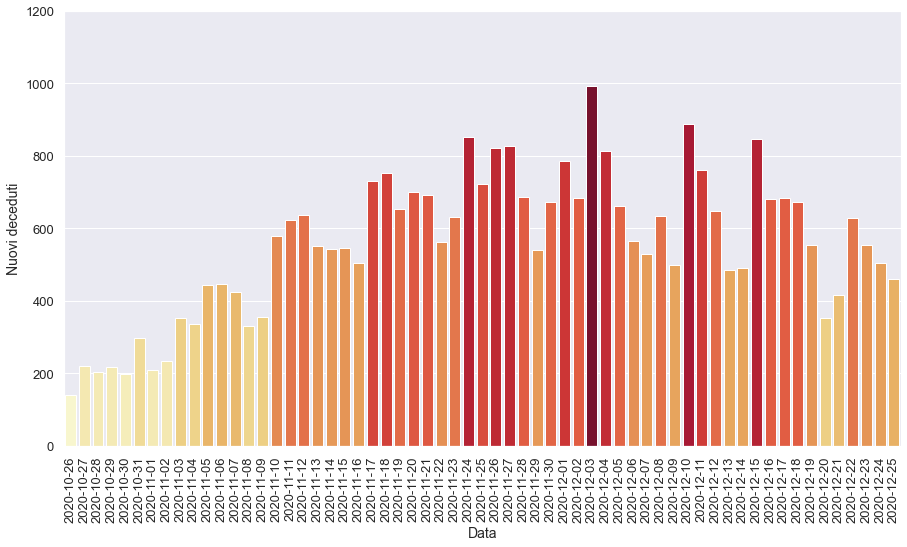

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

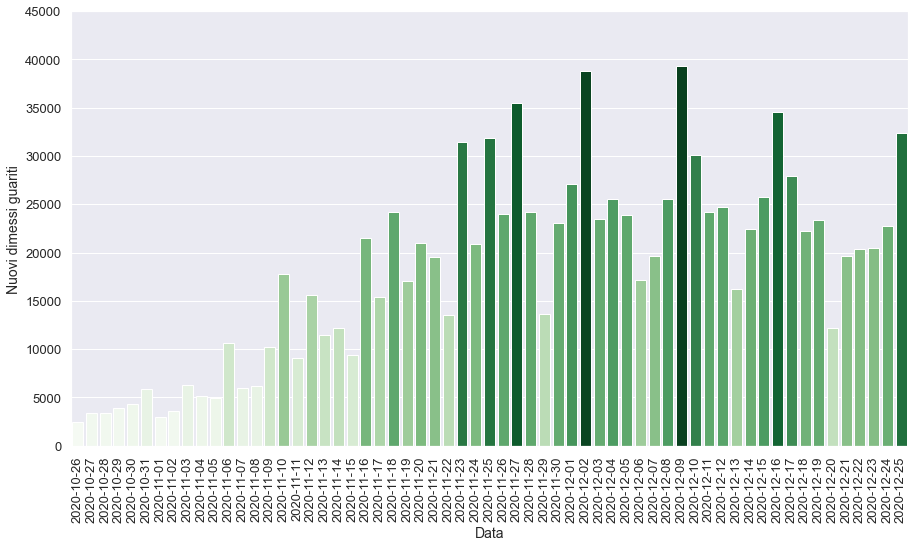

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-25T17:00:00,34313,3848,38161,753536,791697,-6689,25853,637149,52028,...,31819.0,722.0,230007.0,114177.0,10.08,4.82,11.24,22.64,0.84,-0.84
1,2020-11-26T17:00:00,34038,3846,37884,757961,795845,4148,29003,661180,52850,...,24031.0,822.0,232711.0,110261.0,10.15,4.76,12.46,26.30,-0.05,0.52
2,2020-11-27T17:00:00,33684,3782,37466,750427,787893,-7952,28352,696647,53677,...,35467.0,827.0,222803.0,106021.0,10.09,4.76,12.73,26.74,-1.66,-1.00
3,2020-11-28T17:00:00,33299,3762,37061,752247,789308,1415,26323,720861,54363,...,24214.0,686.0,225940.0,112839.0,10.15,4.70,11.65,23.33,-0.53,0.18
4,2020-11-29T17:00:00,32879,3753,36632,759139,795771,6463,20648,734503,54904,...,13642.0,541.0,176934.0,80132.0,10.25,4.60,11.67,25.77,-0.24,0.82
5,2020-11-30T17:00:00,33187,3744,36931,751540,788471,-7300,16377,757507,55576,...,23004.0,672.0,130524.0,64252.0,10.14,4.68,12.55,25.49,-0.24,-0.92
6,2020-12-01T17:00:00,32811,3663,36474,743471,779945,-8526,19350,784595,56361,...,27088.0,785.0,182100.0,85112.0,10.04,4.68,10.63,22.73,-2.16,-1.08
7,2020-12-02T17:00:00,32454,3616,36070,725160,761230,-18715,20709,823335,57045,...,38740.0,684.0,207143.0,95599.0,10.02,4.74,10.00,21.66,-1.28,-2.40
8,2020-12-03T17:00:00,31772,3597,35369,724613,759982,-1248,23225,846809,58038,...,23474.0,993.0,220047.0,97592.0,10.17,4.65,10.55,23.80,-0.53,-0.16
9,2020-12-04T17:00:00,31200,3567,34767,722935,757702,-2280,24099,872385,58852,...,25576.0,814.0,212741.0,83491.0,10.26,4.59,11.33,28.86,-0.83,-0.30


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

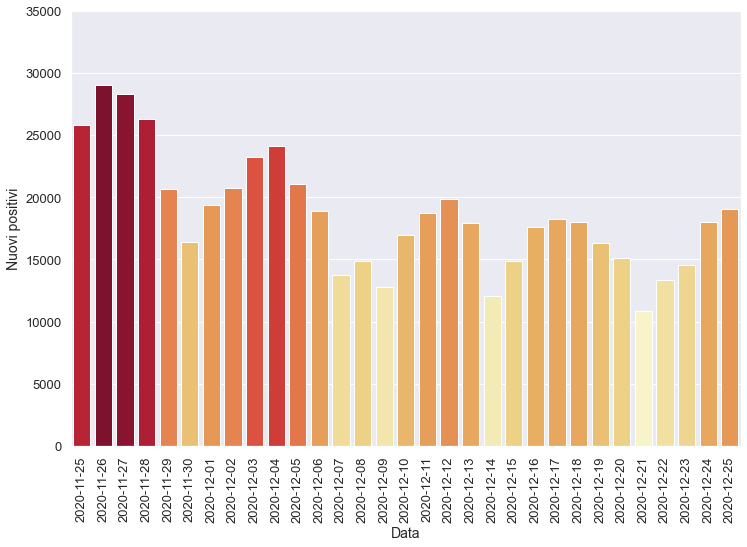

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

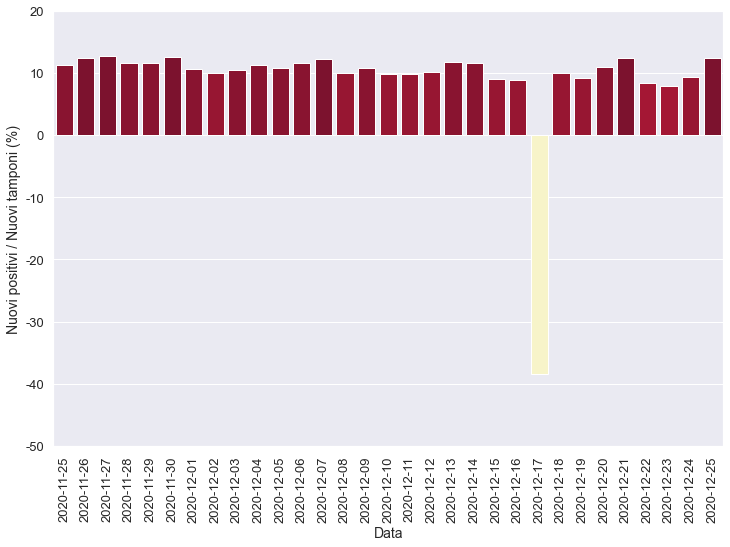

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

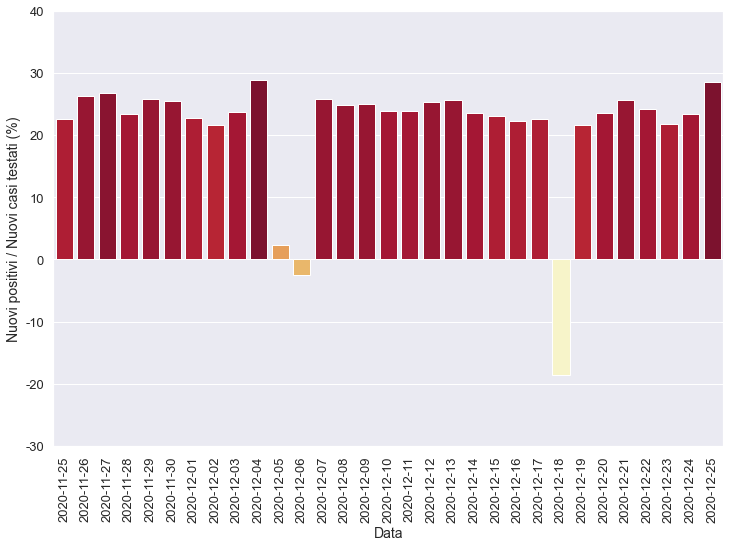

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

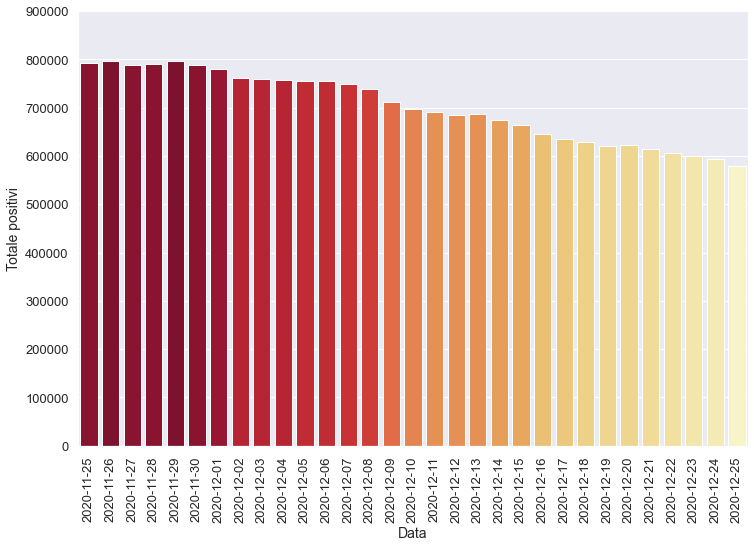

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

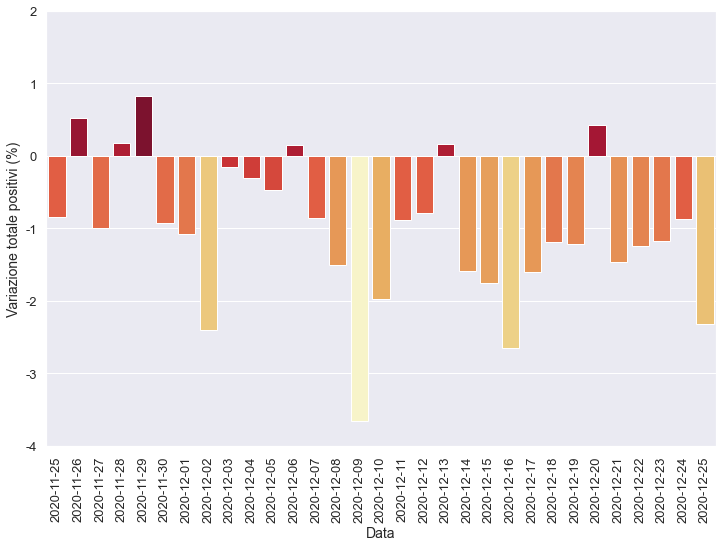

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

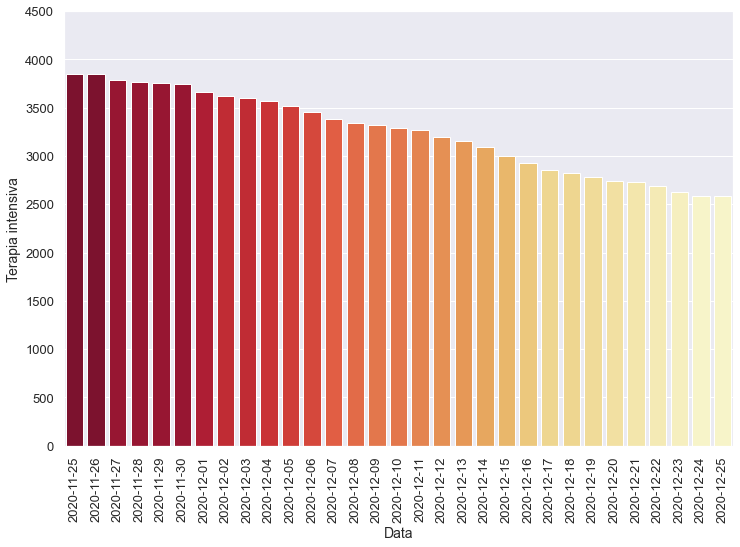

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

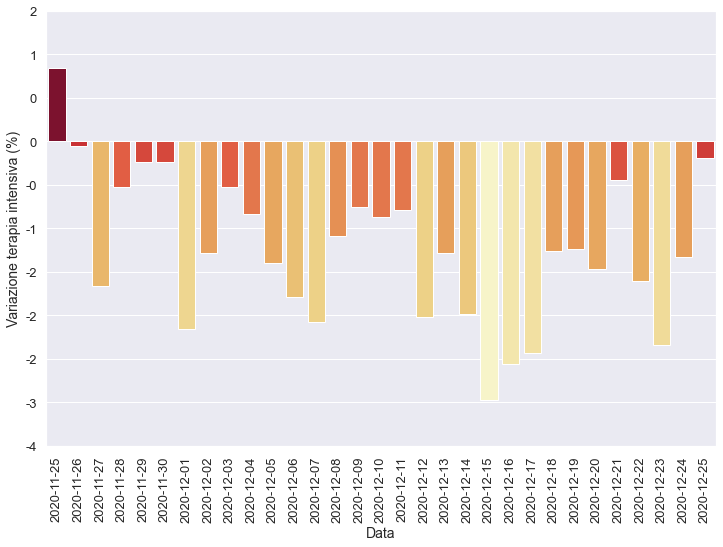

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

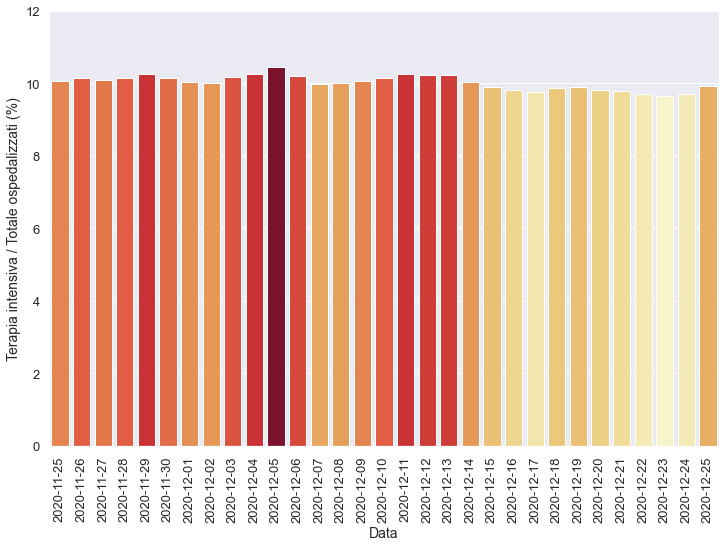

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

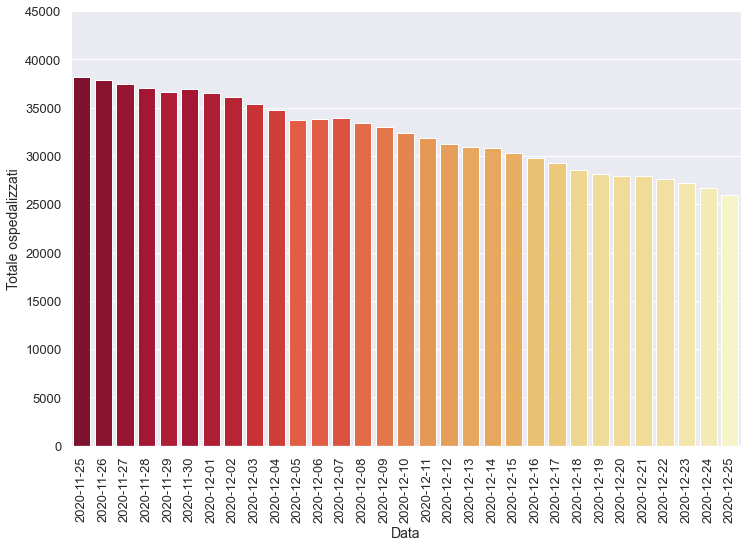

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

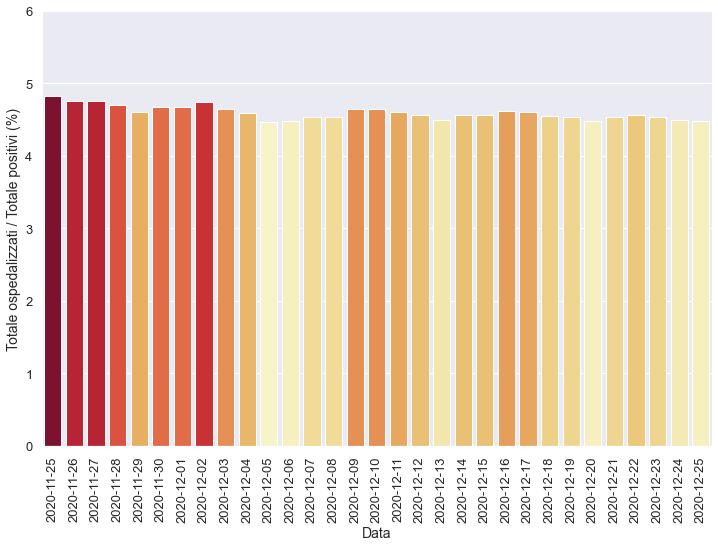

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

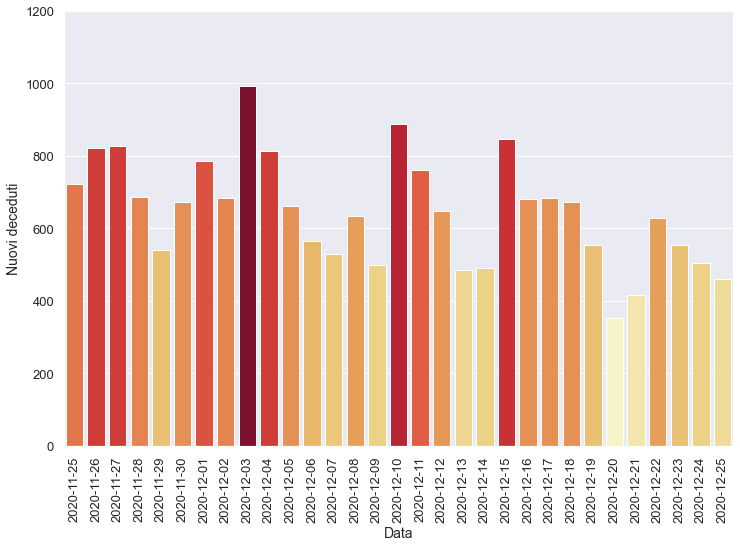

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

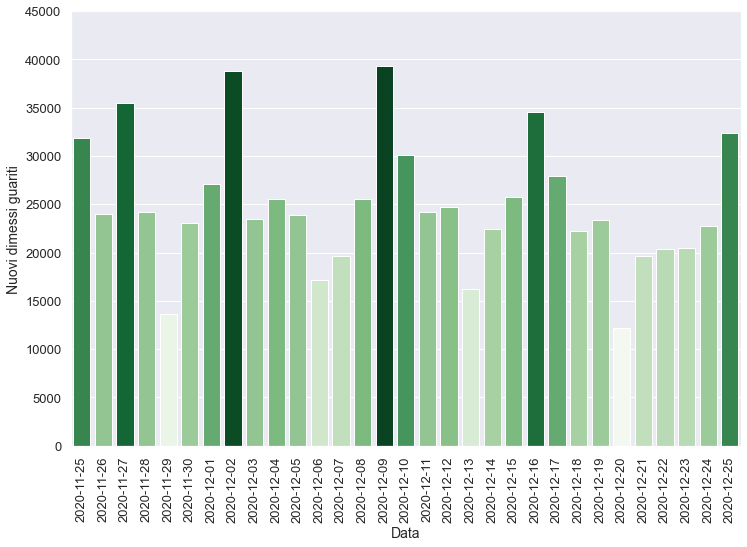

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-18T17:00:00,25769,2819,28588,599210,627798,-7545,17992,1226086,67894,...,22272.0,674.0,179800.0,-96651.0,9.86,4.55,10.01,-18.62,-1.26,-1.19
1,2020-12-19T17:00:00,25364,2784,28148,592018,620166,-7632,16308,1249470,68447,...,23384.0,553.0,176185.0,75112.0,9.89,4.54,9.26,21.71,-1.24,-1.22
2,2020-12-20T17:00:00,25158,2743,27901,594859,622760,2594,15104,1261626,68799,...,12156.0,352.0,137420.0,64294.0,9.83,4.48,10.99,23.49,-1.47,0.42
3,2020-12-21T17:00:00,25145,2731,27876,585706,613582,-9178,10872,1281258,69214,...,19632.0,415.0,87889.0,42338.0,9.80,4.54,12.37,25.68,-0.44,-1.47
4,2020-12-22T17:00:00,24948,2687,27635,578320,605955,-7627,13318,1301573,69842,...,20315.0,628.0,157705.0,55016.0,9.72,4.56,8.44,24.21,-1.61,-1.24
5,2020-12-23T17:00:00,24546,2624,27170,571646,598816,-7139,14522,1322067,70395,...,20494.0,553.0,183864.0,66673.0,9.66,4.54,7.90,21.78,-2.34,-1.18
6,2020-12-24T17:00:00,24070,2589,26659,566973,593632,-5184,18040,1344785,70900,...,22718.0,505.0,193777.0,77185.0,9.71,4.49,9.31,23.37,-1.33,-0.87
7,2020-12-25T17:00:00,23402,2584,25986,553900,579886,-13746,19037,1377109,71359,...,32324.0,459.0,152334.0,66707.0,9.94,4.48,12.50,28.54,-0.19,-2.32


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

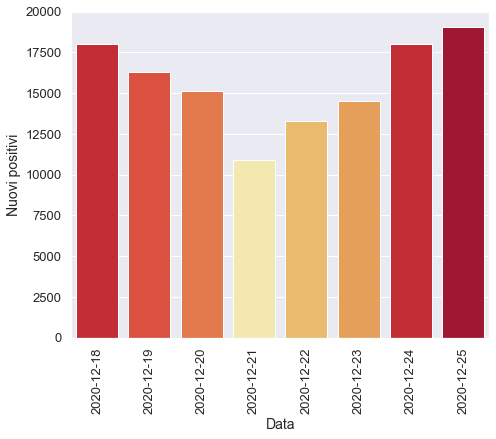

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

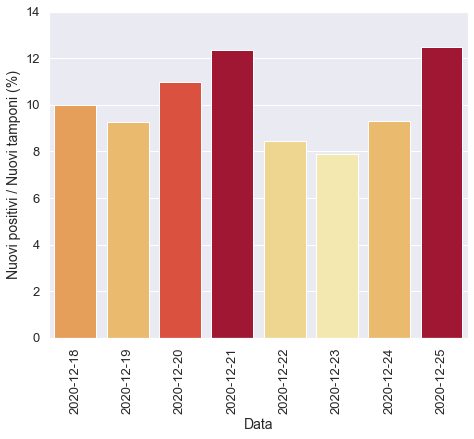

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

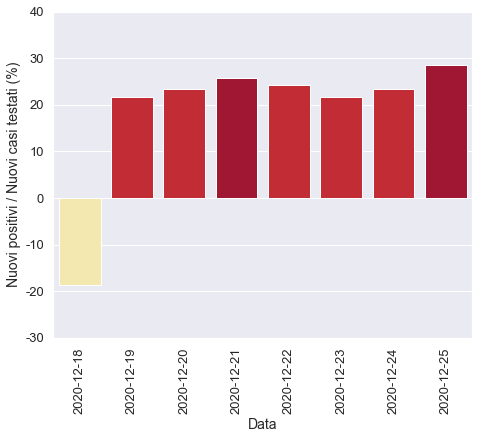

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

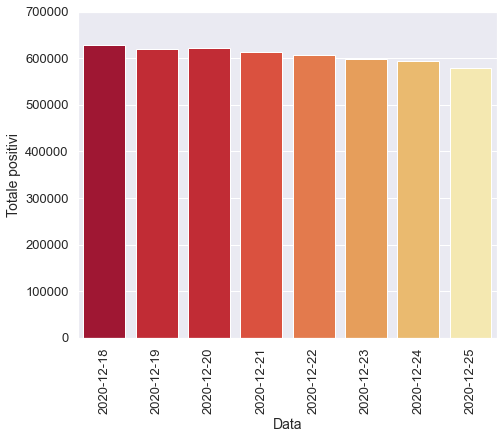

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

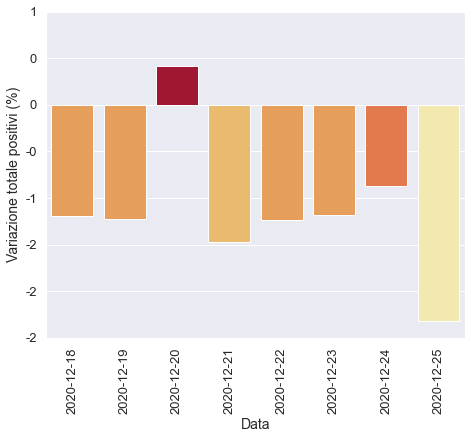

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

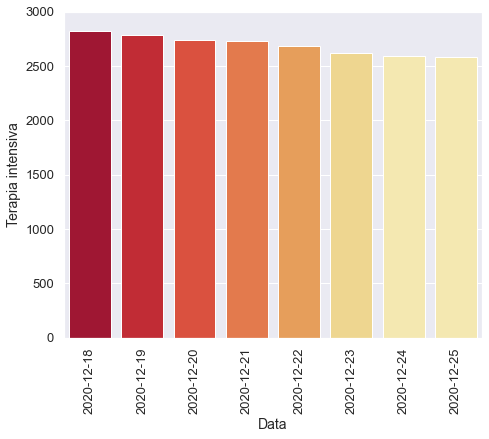

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

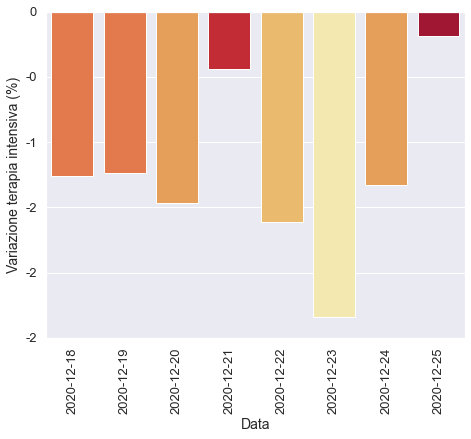

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

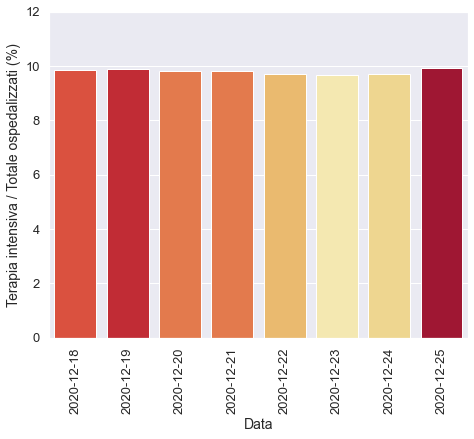

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

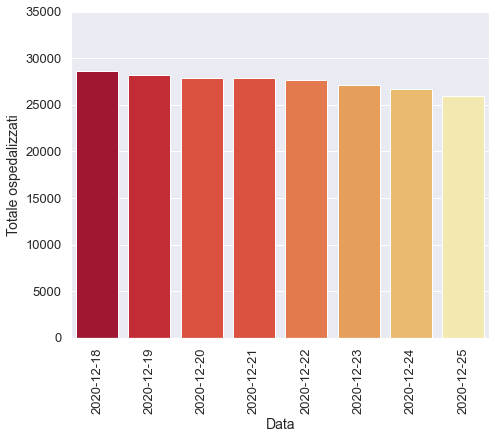

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

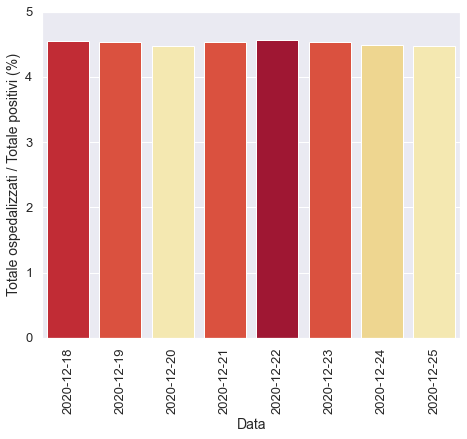

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

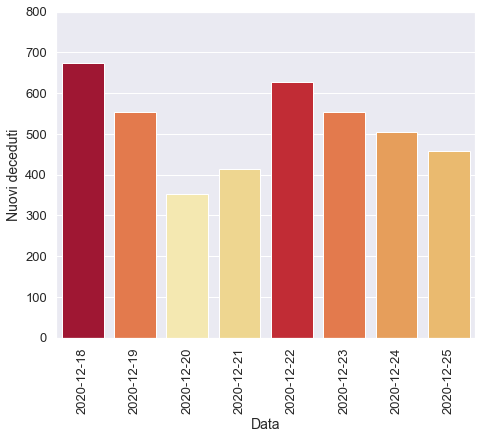

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

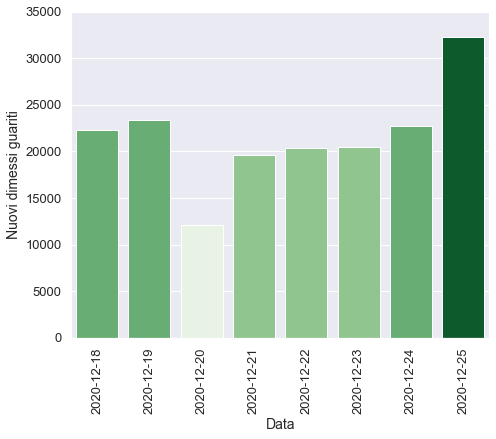

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)